## Import Project

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
%matplotlib inline


### Processing Data

In [2]:
import glob
import pickle
import matplotlib.image as mpimg

def load_training_files():
    car_files = glob.glob('data/training_images/vehicles/**/*.png')
    notcar_files = glob.glob('data/training_images/non-vehicles/**/*.png')
    
    imread_func = mpimg.imread
#     imread_func = cv2.imread # cv2 uses bgr format
    cars = map(imread_func, car_files)
    notcars = map(imread_func, notcar_files)
    
    return cars, notcars

cars_map, notcars_map = load_training_files()



### Saving processed images

In [3]:
pickle.dump(list(cars_map), open('data/car_imgs.p', 'wb'))
pickle.dump(list(notcars_map), open('data/non_car_imgs.p', 'wb'))

In [4]:
cars = pickle.load(open('data/car_imgs.p', 'rb'))
notcars = pickle.load(open('data/non_car_imgs.p', 'rb'))

### Data Exploration

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


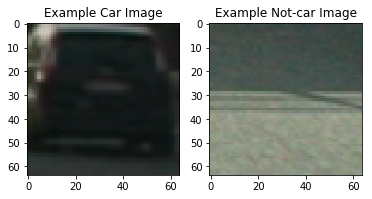

In [5]:

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    car_imgs = np.array(car_list)
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = car_imgs.shape[1:]
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = car_imgs.dtype
    # Return data_dict
    return data_dict
    
def plot_data_look(cars, notcars):
    data_info = data_look(cars, notcars)
    
    print('Your function returned a count of', 
          data_info["n_cars"], ' cars and', 
          data_info["n_notcars"], ' non-cars')
    print('of size: ',data_info["image_shape"], ' and data type:', 
          data_info["data_type"])
    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))

    # Read in car / not-car images
    car_image = cars[car_ind]
    notcar_image = notcars[notcar_ind]


    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(car_image)
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(notcar_image)
    plt.title('Example Not-car Image')

plot_data_look(cars, notcars)